# Data Import and processing
The dataset that I chose has data on penguin sizing measurements. The goal of my project is to create a clustering model that will cluster the penguins into specific species.

In [260]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [261]:
penguins = pd.read_csv('penguins.csv')
penguins.dropna(inplace = True)
sexEncode = pd.get_dummies(penguins['sex'], dtype = int)
penguins = pd.concat([penguins, sexEncode], axis = 1)
penguins.drop(columns = ['sex'], inplace = True)
print(penguins.dtypes)
print(penguins.head())

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
FEMALE                 int32
MALE                   int32
dtype: object
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  FEMALE   
0              39.1             18.7              181.0       3750.0       0  \
1              39.5             17.4              186.0       3800.0       1   
2              40.3             18.0              195.0       3250.0       1   
4              36.7             19.3              193.0       3450.0       1   
5              39.3             20.6              190.0       3650.0       0   

   MALE  
0     1  
1     0  
2     0  
4     0  
5     1  


# Initial Data Exploration
Im looking at the distrobutions of the afew of the data columns so that I can see if there are any outliers that might skew my dataset or if there is anything that i need to make adjustments to.
This step will also include any preprossesing of the data.

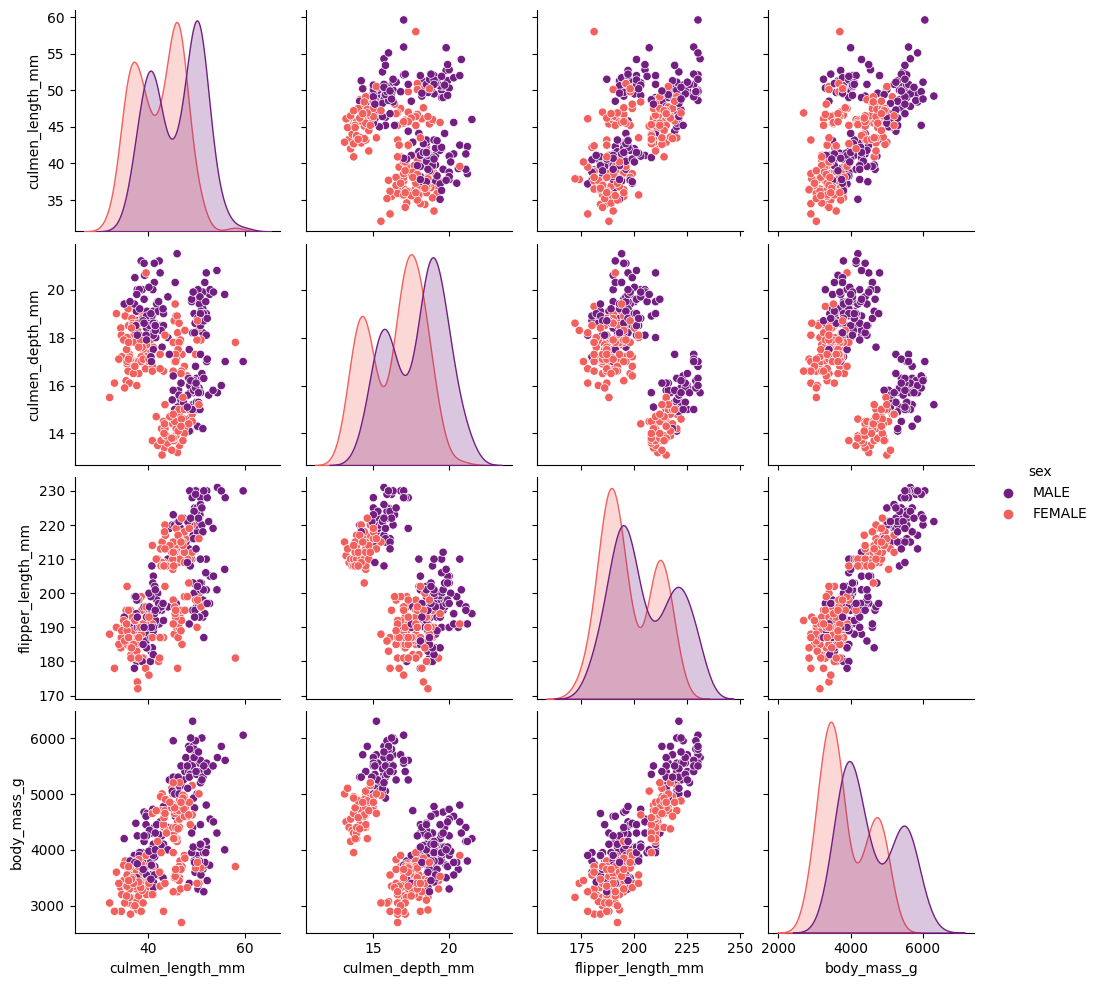

In [262]:
penguinsIn = pd.read_csv('penguins.csv')
penguinsIn.dropna()
continous = [x for x in penguinsIn.columns if penguinsIn[x].dtypes != "O"]
sns.pairplot(vars = continous, data = penguinsIn, hue = 'sex', palette = 'magma')

In [263]:
scaler = StandardScaler()
X = scaler.fit_transform(penguins)
penguinsScaled = pd.DataFrame(data = X, columns = penguins.columns)
penguinsScaled.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042


# Data Modeling
This is where I am building the model itself and doing testing

2


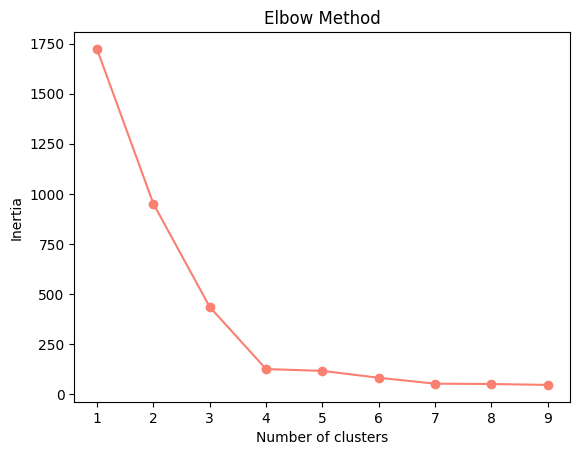

In [264]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
dfx_pca = pca.fit(penguinsScaled)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguinsScaled)
print(n_components)

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o", color = 'salmon')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
n_clusters = 4


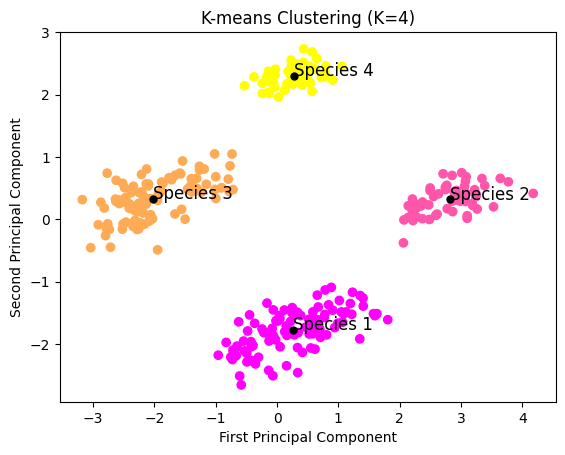

In [265]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
centroids = kmeans.cluster_centers_

plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap = 'spring')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, c = 'black', marker = '.')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f"Species {i + 1}", fontsize=12, color='Black')

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()